# Lead Score  Group Case Study
submitted by
- Rohit Panjabi
- Rahul Singh

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing the required  libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
data_dict=pd.read_excel('Leads Data Dictionary.xlsx',skiprows=2,index_col=1)
data_dict.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data_dict

,Description
Variables,
Prospect ID,A unique ID with which the customer is identif...
Lead Number,A lead number assigned to each lead procured.
Lead Origin,The origin identifier with which the customer ...
Lead Source,"The source of the lead. Includes Google, Organ..."
Do Not Email,An indicator variable selected by the customer...
Do Not Call,An indicator variable selected by the customer...
Converted,The target variable. Indicates whether a lead ...
TotalVisits,The total number of visits made by the custome...
Total Time Spent on Website,The total time spent by the customer on the we...


In [4]:
# importing the dataset
leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# checking the size of the dataframe leads
leads.shape

(9240, 37)

In [6]:
# describing the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Null values check

In [7]:
# checking for null values
null_val=round(leads.isnull().sum()*100/leads.shape[0],3)
null_val

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [8]:
leads=leads.applymap(lambda x:np.NAN if x=='Select' else x)

imputing 'select values as null because there the user didn't provide any information

In [9]:
# checking for null values after imputing the select values as null
null_val=round(leads.isnull().sum()*100/leads.shape[0],3)
null_val

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
How did you hear about X Education               78.463
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

## Data Cleaning

Let's begin the cleaning process by dropping  the columns with null value percentage greate than the 40%

In [10]:
for i in leads.columns:
    if leads[i].isna().sum()*100/leads.shape[0]>=40:
        leads.drop(i,axis=1,inplace=True)

In [11]:
leads.shape

(9240, 30)

We can see that seven columns have been dropeed, now checking the categorical varaibles for skewed data,a dn if it is present then dropping the column as it will give us skewed analysis

In [12]:
# seggregating columns with more than two categories and columns conataing only yes/no as the categories for mapping
cat_cols=[]
map_cols=[]
for i in leads.columns:
    if leads[i].dtypes==object:
        if len(leads[i].value_counts().index)>2:
            cat_cols.append(i)
        else:
            map_cols.append(i)

Having a look at the categorical columns for high skewness

In [13]:
for i in cat_cols:
    print(i)
    print(leads[i].value_counts(normalize=True))
    print()

Prospect ID
b1a5baad-4d3d-4b05-b92b-57fb7746fdc6    0.000108
59d2f9c6-d03e-4c51-8324-0c76feb19df6    0.000108
0d804a8e-2fa9-465a-807d-033b2f4b9115    0.000108
17bea3a8-1bd1-490c-a084-41ff68f5a44f    0.000108
e856ceb5-8371-4816-8ade-b89e947117d3    0.000108
                                          ...   
ba2e2014-707b-46a2-843c-498abf873d77    0.000108
d0be0023-2511-4621-8a66-972bf64cfa35    0.000108
7fe58087-011d-4b7d-9b63-8866230e9a02    0.000108
e39b2e93-99e3-4c13-abd0-f08e5ca0f416    0.000108
724efd71-6b61-463c-a872-e1d63fc3b163    0.000108
Name: Prospect ID, Length: 9240, dtype: float64

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak We

- From the above output we can see that we need to dop the `country` column as it highly skewed towards india
- From the above output we can see that we need to dop the  `What is your current occupation`column as it highly skewed towards Unemployed
- `What matters most to you in choosing a course` dropping this also as it is very heavily skewed towards better career prosoects


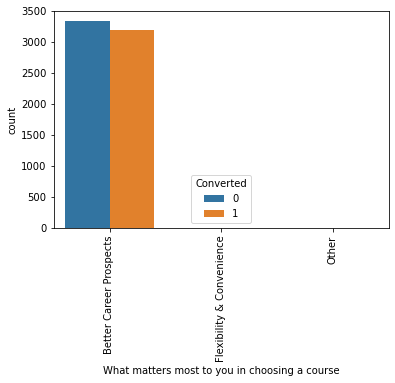

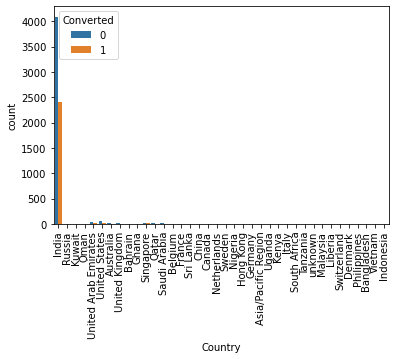

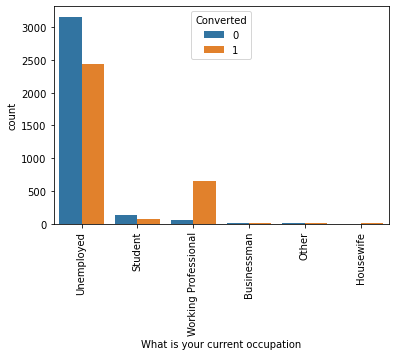

In [14]:
# visualisng these three columns before dropping them.
for i in ['What matters most to you in choosing a course','Country','What is your current occupation']:
    sns.countplot(leads[i],hue=leads['Converted'])
    plt.xticks(rotation=90)
    plt.show()

In [15]:
leads.drop(['What matters most to you in choosing a course','Country','What is your current occupation'],axis=1,inplace=True)

### Now Rechecking the null value count among the data

In [16]:
null_values=leads.isnull().sum()*100/leads.shape[0]
null_values[null_values>0]

Lead Source              0.389610
TotalVisits              1.482684
Page Views Per Visit     1.482684
Last Activity            1.114719
Specialization          36.580087
Tags                    36.287879
City                    39.707792
dtype: float64

 <span style='background:cyan'> CITY </span>

In [17]:
leads['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [18]:
# imputing the null_Values with mumbai
leads['City'].replace({np.nan:'Mumbai'},inplace=True)
leads['City'].value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

<span style='background:cyan' > Specilization </span>

In [19]:
# checking for nul values percentage in specialization
leads['Specialization'].isnull().sum()*100/leads.shape[0]

36.58008658008658

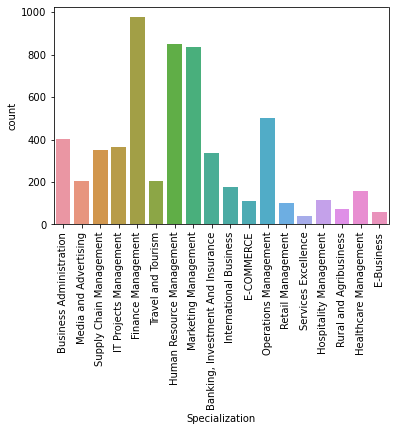

In [20]:
# before imputing
leads['Specialization'].value_counts().head()

sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

Imputing the null values with others, as the lead may be student or not in any of the above mentioned specialisation

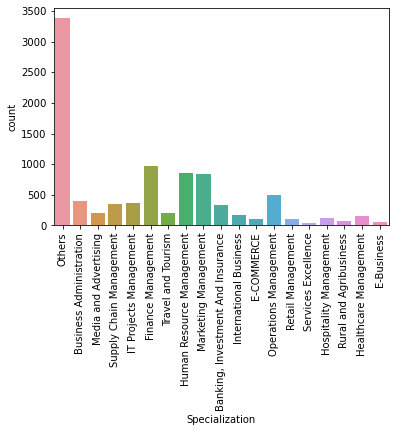

In [21]:
# imputation process
leads['Specialization'].replace({np.NAN:'Others'},inplace=True)
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

<span style='background:cyan'> Tags </span>

In [22]:
# before imputation checking for value_counts
tag=leads['Tags'].value_counts(normalize=True)*100
tag

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

Imputing this column with the 'Will revert after reading the email' as it is the most frequent

In [23]:
leads['Tags'].replace({np.nan:tag.index[0]},inplace=True)
leads['Tags'].value_counts().head(8)

Will revert after reading the email    5425
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

Standerising the column so that the indexes categories get minimised

In [24]:
tag_replace=tag.index[8:]
tag_replace.to_list()

['Not doing further education',
 'Interested  in full time MBA',
 'Graduation in progress',
 'invalid number',
 'Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Want to take admission but has financial problems',
 'Still Thinking',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'Shall take in the next coming month',
 'University not recognized',
 'Recognition issue (DEC approval)']

In [25]:
# replacing all the values present in the above tag_replace list to 'others'
for i in tag_replace:
    leads['Tags']=leads['Tags'].replace({i:'Others'})

In [26]:
leads.Tags.value_counts()

Will revert after reading the email    5425
Ringing                                1203
Others                                  675
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

#### Now as the null values present in the rows is very less , dropping them as they are very less in number

In [27]:
leads.dropna(how='any',inplace=True)

#### Standerising the lead source column

In [28]:
# standerising the Lead source column
leads.loc[leads['Lead Source']=='google','Lead Source']='Google'
# cleaning up the lead source column
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

### Dropping the remaing columns generated by the sales team

In [29]:

# columns left which are generated by the sales teams after data cleaning are
sales=['Last Notable Activity','Last Activity','Tags']
# dropping the above two columns
leads.drop(sales,axis=1,inplace=True)

In [30]:
# recheking the shape of the dataframe
leads.shape

(9074, 24)

In [31]:
# Retention rate of the data frame
'''
Retention rate=(present umber of columns/Number of columns before data cleaning)
'''
(25/37)*100

67.56756756756756

Retention rate is approx 67%

In [32]:
## updating the cat_cols and num_cols
# seggregating columns with more than two categories and columns conataing only yes/no as the categories for mapping
cat_cols=[]
map_cols=[]
for i in leads.columns:
    if leads[i].dtypes==object:
        if len(leads[i].value_counts().index)>2:
            cat_cols.append(i)
        else:
            map_cols.append(i)

### EDA 

<span style='background:cyan'> Conversion rate</span>

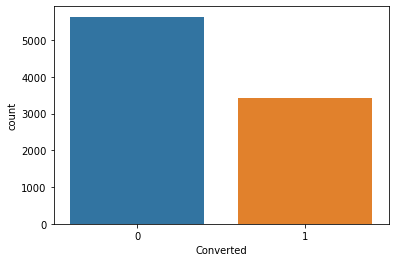

In [33]:
sns.countplot(leads.Converted)
plt.show()

In [34]:
# calculating the conversion rate 
leads['Converted'].sum()*100/leads.shape[0]

37.85541106458012

The conversion rate of the dataset at the moment is about 38%

<span style='background:cyan'> Specialization</span>

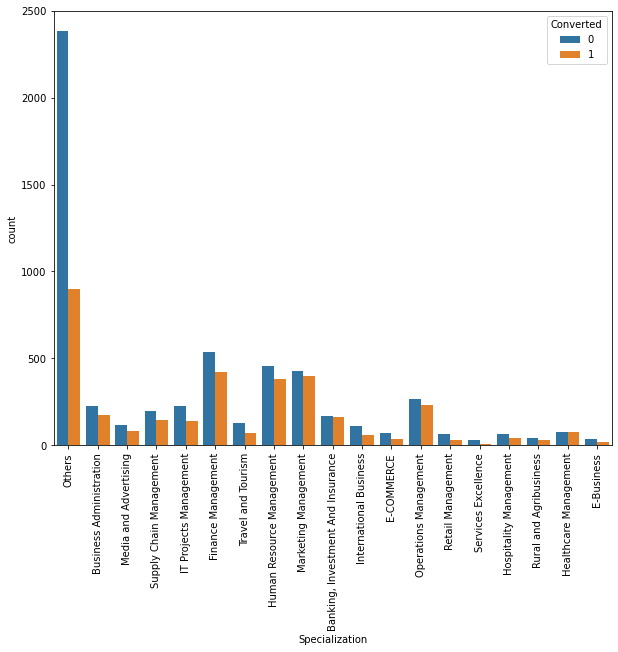

In [35]:
plt.figure(figsize=[10,8])
sns.countplot(leads['Specialization'],hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

<span style='background:cyan'> Lead Origin </span>

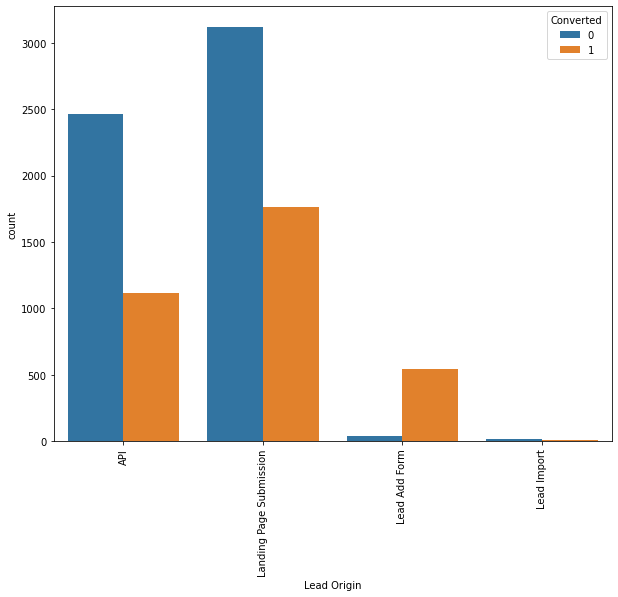

In [36]:
plt.figure(figsize=[10,8])
sns.countplot(leads['Lead Origin'],hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

<span style='background:cyan'> Lead Source </span>

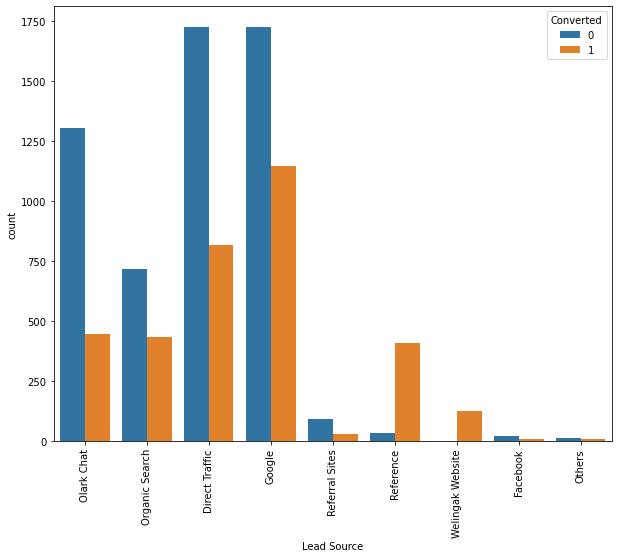

In [37]:
plt.figure(figsize=[10,8])
sns.countplot(leads['Lead Source'],hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

<span style='background:cyan'> city </span>

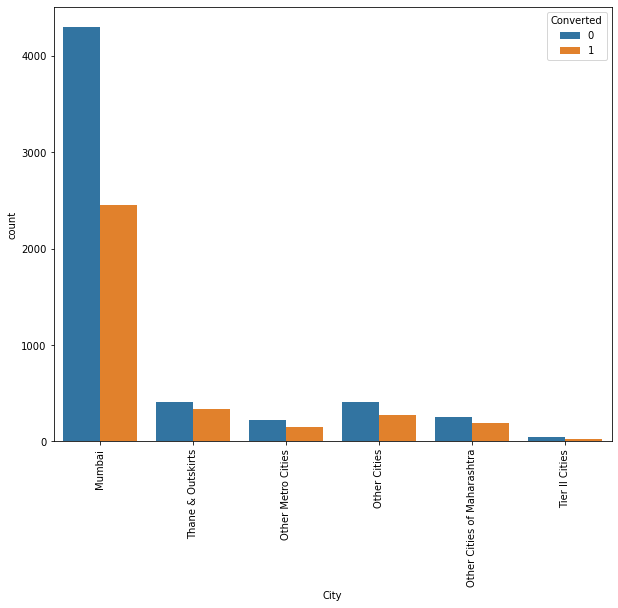

In [38]:
plt.figure(figsize=[10,8])
sns.countplot(leads['City'],hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

<span style='background:cyan'> TotalVisits vs Total time spent on the website </span>

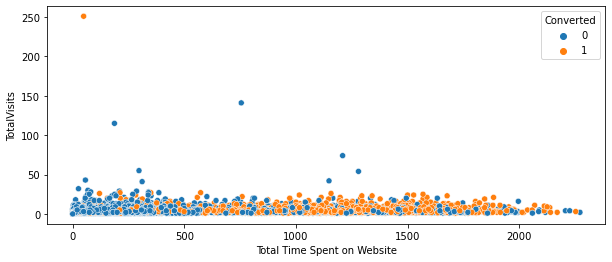

In [39]:
plt.figure(figsize=[10,4])
sns.scatterplot(y='TotalVisits',x='Total Time Spent on Website',data=leads,hue='Converted',)
plt.show()

<span style='background:cyan'> TotalVisits vs Page Views per Visits</span>

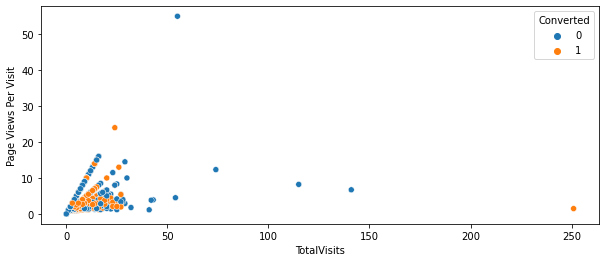

In [40]:
plt.figure(figsize=[10,4])
sns.scatterplot(x='TotalVisits',y='Page Views Per Visit',data=leads,hue='Converted',)
plt.show()

<span style='background:cyan'> Total Time Spent on Website vs Page Views per Visits</span>

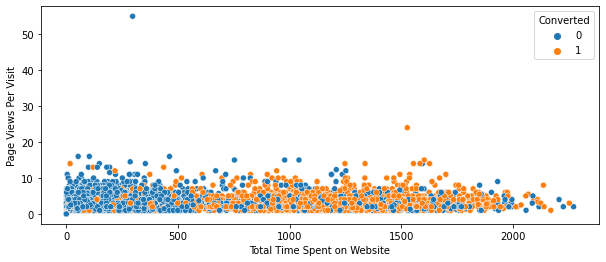

In [41]:
plt.figure(figsize=[10,4])

sns.scatterplot(x='Total Time Spent on Website',y='Page Views Per Visit',data=leads,hue='Converted',)
plt.show()

<span style='background:cyan'>Map columns </span>

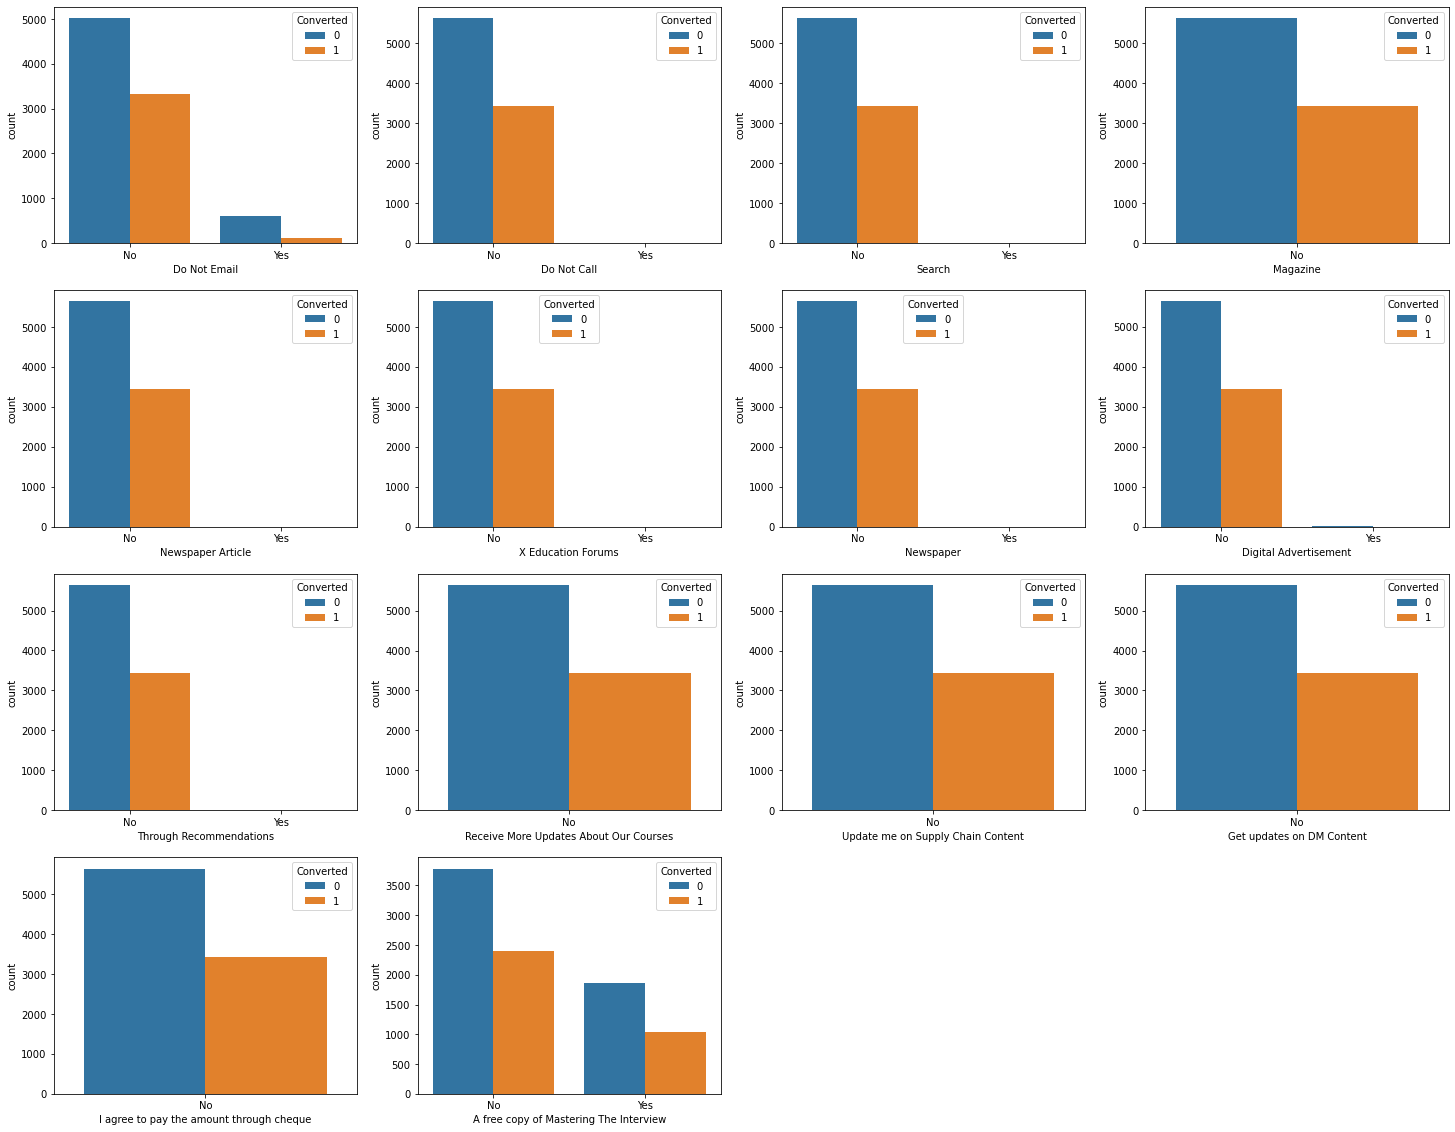

In [42]:
plt.figure(figsize=[25,20])
j=1
for i in map_cols:
    plt.subplot(4,4,j)
    
    sns.countplot(leads[i],hue=leads['Converted'])
    j+=1
plt.show()

## Treating outliers

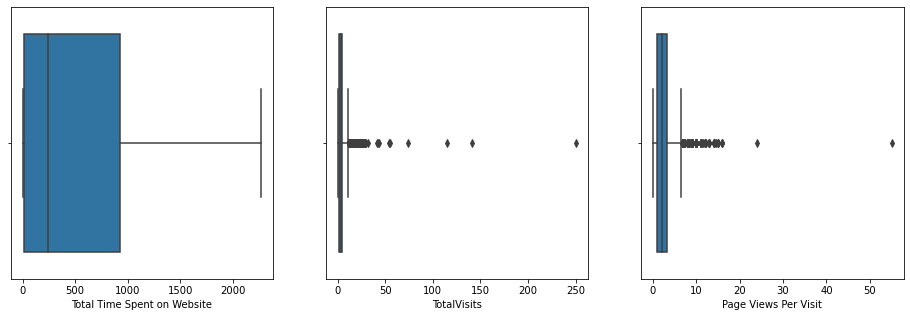

In [43]:
num_cols=['Total Time Spent on Website','TotalVisits','Page Views Per Visit']
plt.figure(figsize=[16,5])
j=1
for i in num_cols:
    plt.subplot(1,3,j)
    sns.boxplot(leads[i])
    j+=1
plt.show()

In [44]:
# Handling outliers
leads[num_cols[1:]].describe()


,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.456028,2.370151
std,4.858802,2.160871
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.200000
max,251.000000,55.000000


In [45]:
# checking for various quantiles
print('For',num_cols[1])
leads[num_cols[1]].quantile([0,0.1,0.5,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

For TotalVisits


0.00     0.0
0.10     0.0
0.50     3.0
0.25     1.0
0.50     3.0
0.75     5.0
0.80     5.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [46]:
# checking for various quantiles
print('For',num_cols[2])
leads[num_cols[2]].quantile([0,0.1,0.5,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

For Page Views Per Visit


0.00    0.0
0.10    0.0
0.50    2.0
0.25    1.0
0.50    2.0
0.75    3.2
0.80    4.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [47]:
# outlier handling for 'TotlaVisits'
Q1=leads['TotalVisits'].quantile(0.05)
Q3=leads['TotalVisits'].quantile(0.95)

IQR=Q3-Q1

leads=leads[(leads['TotalVisits']>=Q1-1.5*IQR) & (leads['TotalVisits']<=Q3+1.5*IQR)]

In [48]:
# Outlier Handling for 'Page Views Per Visit'
Q1=leads['Page Views Per Visit'].quantile(0.05)
Q3=leads['Page Views Per Visit'].quantile(0.95)

IQR=Q3-Q1

leads=leads[(leads['Page Views Per Visit']>=Q1-1.5*IQR) & (leads['Page Views Per Visit']<=Q3+1.5*IQR)]

In [49]:
# Rechecking the shape of the dataframe leads
leads.shape

(9048, 24)

### Multivariate analysis


In [50]:
# create a correlation and then plotting the heatmap
leads_corr=leads.corr()
leads_corr

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.023713,0.040736,0.018994,0.060242
Converted,0.023713,1.000000,0.052506,0.359646,0.004002
TotalVisits,0.040736,0.052506,1.000000,0.328952,0.689369
Total Time Spent on Website,0.018994,0.359646,0.328952,1.000000,0.336208
Page Views Per Visit,0.060242,0.004002,0.689369,0.336208,1.000000


<AxesSubplot:>

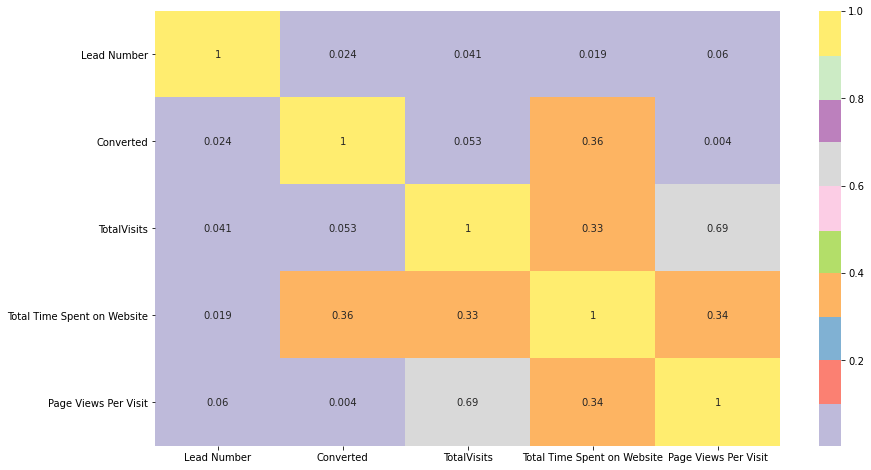

In [51]:
plt.figure(figsize=[14,8])
sns.heatmap(leads_corr,annot=True,cmap='Set3',center=0.4)

### Mapping the Yes and No values to 1 and 0

In [52]:
# removing these four columns from the map_cols as they only contain zero as their value,(observed from eda)
mapcols_remove=['I agree to pay the amount through cheque','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content']
for i in mapcols_remove:
    map_cols.remove(i)
    leads.drop(i,axis=1,inplace=True)

In [53]:
for i in map_cols:
    leads[i]=leads[i].apply(lambda x:1 if x.lower()=='yes' else 0)
    

### Dummyfying  Categorical variables

In [54]:
# having a look at the categorical columns
cat_cols

['Prospect ID', 'Lead Origin', 'Lead Source', 'Specialization', 'City']

In [55]:
# removing prospect_id from the cat_cols
cat_cols.remove('Prospect ID')

In [56]:
# dummifying these varoables

for i in cat_cols:
    dummies=pd.get_dummies(leads[i],drop_first=True,prefix=i)
    dummies['Lead Number']=leads['Lead Number']
    leads.drop(i,axis=1,inplace=True)
    leads=pd.merge(leads,dummies,how='inner',on='Lead Number')

In [57]:
leads.shape

(9048, 50)

### splitting into testdataset and traindataset

In [58]:
leadstrain,leadstest=train_test_split(leads,train_size=0.75,random_state=100)

### Doing analysis on train dataset

### scaling Numerical columns

In [59]:
scaler=StandardScaler()

leadstrain[num_cols]=scaler.fit_transform(leadstrain[num_cols])

In [60]:
# getting the X and y for the train dataset
y=leadstrain.pop('Converted')
X=leadstrain.iloc[:,2:]

In [61]:
# predefining required functions

def vif(df):
    vif=pd.DataFrame()
    vif['Columns']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif.sort_values(by='VIF',ascending=False,inplace=True)
    vif['VIF']=round(vif['VIF'],2)

    return vif


def logitmodel(columns):
    X_sm=sm.add_constant(X[columns])
    model=sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
    print(model.summary())
    
    


In [62]:
# first creating the dataset for understanding
X_sm=sm.add_constant(X)
model=sm.GLM(y,X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6740
Model Family:                Gaussian   Df Model:                           45
Link Function:               identity   Scale:                         0.16133
Method:                          IRLS   Log-Likelihood:                -3415.9
Date:                Mon, 14 Jun 2021   Deviance:                       1087.4
Time:                        08:59:32   Pearson chi2:                 1.09e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4860      0.034     14.294      0.000       0.419       0.553
Do Not Email                                -0.1637      0.019     -8.718      0.000      -0.201      -0.127
Do Not Call                                  0.0485      0.285      0.170      0.865      -0.510       0.607
TotalVisits                                  0.0304      0.007      4.294      0.000       0.017       0.044
Total Time Spent on Website                  0.2151      0.006     38.315      0.000       0.204       0.226
Page Views Per Visit                        -0.0161      0.008     -2.050      0.040      -0.031      -0.001
Search                                      -0.0447      0.130     -0.345      0.730      -0.299       0.209
Magazine                                 -6.779e-16   1.06e-15     -0.638      0.523   -2.76e-15     1.4e-15
Newspaper Article                            0.6546      0.403      1.625      0.104      -0.135       1.444
X Education Forums                          -0.7870      0.307     -2.564      0.010      -1.389      -0.185
Newspaper                                   -0.9107      0.403     -2.262      0.024      -1.700      -0.122
Digital Advertisement                       -0.7870      0.307     -2.564      0.010      -1.389      -0.185
Through Recommendations                      0.3399      0.204      1.667      0.096      -0.060       0.740
A free copy of Mastering The Interview      -0.0448      0.016     -2.875      0.004      -0.075      -0.014
Lead Origin_Landing Page Submission         -0.1392      0.019     -7.154      0.000      -0.177      -0.101
Lead Origin_Lead Add Form                    0.2487      0.173      1.440      0.150      -0.090       0.587
Lead Origin_Lead Import                      0.3440      0.412      0.834      0.404      -0.464       1.152
Lead Source_Facebook                        -0.0861      0.403     -0.214      0.831      -0.876       0.703
Lead Source_Google                           0.0276      0.016      1.687      0.092      -0.004       0.060
Lead Source_Olark Chat                       0.1808      0.022      8.208      0.000       0.138       0.224
Lead Source_Organic Search                   0.0446      0.019      2.377      0.017       0.008       0.081
Lead Source_Others                          -0.0373      0.106     -0.351      0.726      -0.246       0.171
Lead Source_Reference                        0.4464      0.175      2.557      0.011       0.104       0.789
Lead Source_Referral Sites                  -0.0289      0.046     -0.625      0.532      -0.120       0.062
Lead Source_Welingak Website                 0.6660      0.178      3.747      0.000       0.318       1.014
Specialization_Business Adminis

We will drop these insignificant variables having high p- values

In [63]:
# RFE (Recursive Feature Elimination :- automated sorting of lesser important columns)

Rfemodel=LogisticRegression()

rfe=RFE(Rfemodel,15).fit(X,y)

In [64]:
# Having a look at the columns, whether or not they will have an impact on our model according to the rfe
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Search', False, 9),
 ('Magazine', False, 33),
 ('Newspaper Article', False, 8),
 ('X Education Forums', True, 1),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 31),
 ('Specialization_E-Business', False, 28),
 ('Specialization_

In [65]:
# seggregating support_columns from the false 
sup_cols=X.columns[rfe.support_]
# converting this series into list
columns=sup_cols.to_list()
columns

['Do Not Email',
 'Total Time Spent on Website',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Facebook',
 'Lead Source_Olark Chat',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Specialization_Hospitality Management',
 'Specialization_Others']

Now checking and eliminating the columns with p value higher than the 0.05

In [66]:
# model 1
logitmodel(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6771
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3314.9
Date:                Mon, 14 Jun 2021   Deviance:                       6629.8
Time:                        08:59:34   Pearson chi2:                 6.78e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Removing column `X Education Forums` due to high p value

In [67]:
columns.remove('X Education Forums')
logitmodel(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6771
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3314.9
Date:                Mon, 14 Jun 2021   Deviance:                       6629.8
Time:                        08:59:35   Pearson chi2:                 6.78e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Removing the columns ` Newspaper` as it has the p values greater than 0.05

In [68]:
# model 3
columns.remove('Newspaper')
logitmodel(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6772
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3316.9
Date:                Mon, 14 Jun 2021   Deviance:                       6633.8
Time:                        08:59:35   Pearson chi2:                 6.78e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

 Removing `Digital Advertisement` as it has p value greater than 0.05

In [69]:
# model 4
columns.remove('Digital Advertisement')
logitmodel(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6773
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3319.3
Date:                Mon, 14 Jun 2021   Deviance:                       6638.5
Time:                        08:59:35   Pearson chi2:                 6.78e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

removing the column` Lead origin Lead import` because the p value for that particular column is >0.05

In [70]:
# model 5
columns.remove('Lead Origin_Lead Import')
logitmodel(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6774
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3319.5
Date:                Mon, 14 Jun 2021   Deviance:                       6639.0
Time:                        08:59:35   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Removing ` Through Recommendations`

In [71]:
# model 6
columns.remove('Through Recommendations')
logitmodel(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6775
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3320.1
Date:                Mon, 14 Jun 2021   Deviance:                       6640.1
Time:                        08:59:35   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Removing ` Lead Origin lead Add form`

In [72]:
# model 7
columns.remove('Lead Origin_Lead Add Form')
logitmodel(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6776
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3320.6
Date:                Mon, 14 Jun 2021   Deviance:                       6641.3
Time:                        08:59:35   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Removing `Specialization Hospitality manmagement`

In [73]:
# model 8
columns.remove('Specialization_Hospitality Management')
logitmodel(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6786
Model:                            GLM   Df Residuals:                     6777
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3322.6
Date:                Mon, 14 Jun 2021   Deviance:                       6645.1
Time:                        08:59:35   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [74]:
vif(X[columns])

,Columns,VIF
4,Lead Source_Olark Chat,1.87
7,Specialization_Others,1.82
1,Total Time Spent on Website,1.25
2,Lead Origin_Landing Page Submission,1.14
0,Do Not Email,1.10
6,Lead Source_Welingak Website,1.07
5,Lead Source_Reference,1.05
3,Lead Source_Facebook,1.01


Vif values all seems to be within range 

Model 8  meets our standard lets name it as final model

In [75]:
X_sm=sm.add_constant(X[columns])
finalmodel=sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()

### Making predictions on train dataset

In [76]:
# for train dataset
y_pred=finalmodel.predict(X_sm)

In [77]:
y_pred.head()

728     0.114021
1711    0.297154
4100    0.147994
3624    0.166340
1072    0.474534
dtype: float64

Now creating a new prob_df

In [78]:
# creating dataset to compare thresholds and get the best accuracy, sensitivity and specificity
prob_df=pd.DataFrame()
prob_df['Lead Number']=leadstrain['Lead Number']
prob_df['Actual']=y
prob_df['Probabilities']=y_pred

In [79]:
prob_df.head()

,Lead Number,Actual,Probabilities
728,652531,0,0.114021
1711,642146,1,0.297154
4100,619533,0,0.147994
3624,624431,0,0.166340
1072,648125,0,0.474534


In [80]:
# comparing various theresholds with the probabilities and assigning the values as either 1 or zero

threshold_list=threshold_list=[i/10 for i in range(0,10)]

for i in threshold_list:
    prob_df[i]=prob_df['Probabilities'].apply(lambda x:1 if x>=i else 0)

In [81]:
prob_df.head()

,Lead Number,Actual,Probabilities,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
728,652531,0,0.114021,1,1,0,0,0,0,0,0,0,0
1711,642146,1,0.297154,1,1,1,0,0,0,0,0,0,0
4100,619533,0,0.147994,1,1,0,0,0,0,0,0,0,0
3624,624431,0,0.166340,1,1,0,0,0,0,0,0,0,0
1072,648125,0,0.474534,1,1,1,1,1,0,0,0,0,0


In [82]:
# comparing Sensitivity,Accuracy and Specificity for the various thresholds


cutoff_df=pd.DataFrame(columns=['Threshold','Accuracy','Sensitivity','Specificity'])

for i in threshold_list:
    cm=confusion_matrix(prob_df['Actual'],prob_df[i])
    TN=cm[0,0]
    TP=cm[1,1]
    FP=cm[0,1]
    FN=cm[1,0]
    
    cutoff_df.loc[i,'Threshold']=i
    cutoff_df.loc[i,'Accuracy']=(TN+TP)/(TN+TP+FP+FN)
    cutoff_df.loc[i,'Sensitivity']=TP/(TP+FN)
    cutoff_df.loc[i,'Specificity']=TN/(TN+FP)
    
cutoff_df

,Threshold,Accuracy,Sensitivity,Specificity
0.0,0,0.379163,1,0
0.1,0.1,0.44135,0.992227,0.104913
0.2,0.2,0.603448,0.911387,0.415381
0.3,0.3,0.782788,0.762145,0.795395
0.4,0.4,0.790156,0.708511,0.840019
0.5,0.5,0.779251,0.636611,0.866366
0.6,0.6,0.752579,0.498251,0.907904
0.7,0.7,0.727527,0.38049,0.939473
0.8,0.8,0.702181,0.266226,0.968431
0.9,0.9,0.676835,0.160124,0.992404


In [83]:
# converting the values to float
cutoff_df=cutoff_df.applymap(lambda x:round(float(x),2))

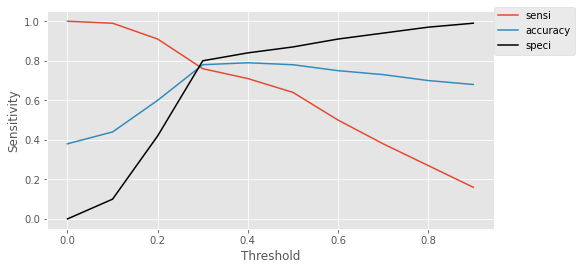

In [84]:
# plotting all the values of the cut00ff_df as line plot to get the optimal threshold
plt.figure(figsize=[8,4])
plt.style.use('ggplot')
sns.lineplot(data=cutoff_df,x='Threshold',y='Sensitivity',label='sensi')
sns.lineplot(data=cutoff_df,x='Threshold',y='Accuracy',label='accuracy')
sns.lineplot(data=cutoff_df,x='Threshold',y='Specificity',color='black',label='speci')

plt.legend(loc=[1,0.8])
plt.show()

now as our cutoff point is between 0.2 and 0.3 , lets elaborate to get the most optimal threshold point

In [85]:
threshold_list=threshold_list=[i/100 for i in range(21,30)]

for i in threshold_list:
    prob_df[i]=prob_df['Probabilities'].apply(lambda x:1 if x>=i else 0)

In [86]:
# comparing Sensitivity,Accuracy and Specificity for the various thresholds between 0.21 and 0.3


cutoff_df=pd.DataFrame(columns=['Threshold','Accuracy','Sensitivity','Specificity'])

for i in threshold_list:
    cm=confusion_matrix(prob_df['Actual'],prob_df[i])
    TN=cm[0,0]
    TP=cm[1,1]
    FP=cm[0,1]
    FN=cm[1,0]
    
    cutoff_df.loc[i,'Threshold']=i
    cutoff_df.loc[i,'Accuracy']=(TN+TP)/(TN+TP+FP+FN)
    cutoff_df.loc[i,'Sensitivity']=TP/(TP+FN)
    cutoff_df.loc[i,'Specificity']=TN/(TN+FP)
    
cutoff_df

,Threshold,Accuracy,Sensitivity,Specificity
0.21,0.21,0.709696,0.823164,0.640399
0.22,0.22,0.721191,0.812281,0.665559
0.23,0.23,0.732538,0.800622,0.690957
0.24,0.24,0.742558,0.793626,0.71137
0.25,0.25,0.755526,0.790128,0.734394
0.26,0.26,0.764073,0.78391,0.751958
0.27,0.27,0.770115,0.777691,0.765488
0.28,0.28,0.776009,0.771862,0.778543
0.29,0.29,0.780872,0.767586,0.788986


from the above dataframe we can see that the optimal point is 0.25

In [87]:
# creating a confusion matrix and getting the metrics for the predictions
cm=confusion_matrix(prob_df['Actual'],prob_df[0.25])
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

Accuracy=(TN+TP)/(TN+TP+FP+FN)
Sensitivity=TP/float(TP+FN)
Specificity=TN/(TN+FP)

In [88]:

print('Accuracy for Train set is ',f'{round(Accuracy,2)*100} %')
print('Sensitivity for Train set is',f'{round(Sensitivity,2)*100 } %')
print('Specificity for Train set is' ,f'{round(Specificity,2)*100} %')

Accuracy for Train set is  76.0 %
Sensitivity for Train set is 79.0 %
Specificity for Train set is 73.0 %


###  Plotting the ROC (Residual Optimaization curve)

In [89]:
def draw_roc(actual,prob):
    plt.style.use('ggplot')
    fpr,tpr,threshold=roc_curve(actual,prob)
    auc_score=roc_auc_score(actual,prob)
    plt.plot(fpr,tpr,label=f'Roc Curve(area={round(auc_score,2)}')
             
    
    plt.plot([0,1],[0,1],'k--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.suptitle('Reciever Operating Characteristic Example')
    
    plt.legend(loc='lower right')
    
    return None

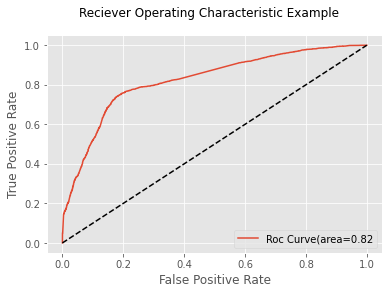

In [90]:
draw_roc(y,y_pred)

## Genertaing The score for the lead based on the probabilities we have obtained

In [91]:
# i will multiply the obtained predicted probabilities with 100 to get the score
prob_df['Score']=prob_df['Probabilities'].apply(lambda x:x*100)
prob_df[['Lead Number','Probabilities','Score']].head()

,Lead Number,Probabilities,Score
728,652531,0.114021,11.402134
1711,642146,0.297154,29.715431
4100,619533,0.147994,14.799435
3624,624431,0.166340,16.634009
1072,648125,0.474534,47.453372


### Making the predictions on Test dataset

### scaling of numerical variables

In [92]:

leadstest[num_cols]=scaler.transform(leadstest[num_cols])

In [93]:
leadstest[num_cols].describe()

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,2262.000000,2262.000000,2262.000000
mean,0.045566,0.013237,0.024227
std,1.018828,1.009466,1.012750
min,-0.878340,-1.009927,-1.143645
25%,-0.848866,-0.705441,-0.654512
50%,-0.412285,-0.096470,-0.165380
75%,0.909893,0.512501,0.323753
max,3.306944,6.602213,6.193345


In [94]:
# seggregating the dataset into dependant and independant variable for furhter analysis
ytest=leadstest.pop('Converted')
Xtest=leadstest.iloc[:,1:]

In [95]:
# finding the probability using the finalmodel and predict

ytest_pred=finalmodel.predict(sm.add_constant(Xtest[columns]))

In [96]:
# creating the testprob_df
testprob_df=pd.DataFrame()
testprob_df['Lead Number']=leadstest['Lead Number']
testprob_df['Actual']=ytest


testprob_df['Probabilities']=ytest_pred

In [97]:
# comparing with our threshold of 0.3 and then classifying them
testprob_df['Predictions']=testprob_df['Probabilities'].apply(lambda x:1 if x>=0.25 else 0)

In [98]:
testprob_df.head()

,Lead Number,Actual,Probabilities,Predictions
4356,616820,1,0.517234,1
5124,609561,0,0.128471,0
4489,615707,1,0.277824,1
4570,614849,1,0.991028,1
5234,608760,0,0.201838,0


Checking for the Metrics and then checking the stability of the model

In [99]:
# creating a confusion matrix
testcm=confusion_matrix(testprob_df['Actual'],testprob_df['Predictions'])
TN=testcm[0,0]
TP=testcm[1,1]
FP=testcm[0,1]
FN=testcm[1,0]

Accuracy=(TN+TP)/(TN+TP+FP+FN)
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)

In [100]:
print('Accuracy for Test set is ',f'{round(Accuracy,2)*100} %')
print('Sensitivity for Test set is',f'{round(Sensitivity,2)*100} %')
print('Specificity for Test set is' ,f'{round(Specificity,2)*100} %')

Accuracy for Test set is  75.0 %
Sensitivity for Test set is 80.0 %
Specificity for Test set is 73.0 %


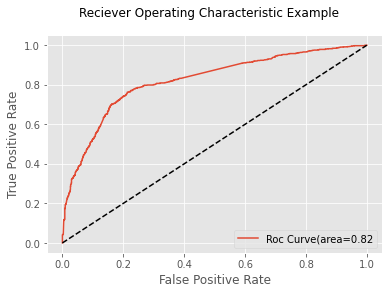

In [101]:
draw_roc(ytest,ytest_pred)

### Finding the score of the test leads based on the Predicted probabilities

In [102]:

testprob_df['Score']=testprob_df['Probabilities'].apply(lambda x:x*100)
testprob_df.head()

,Lead Number,Actual,Probabilities,Predictions,Score
4356,616820,1,0.517234,1,51.723427
5124,609561,0,0.128471,0,12.847087
4489,615707,1,0.277824,1,27.782440
4570,614849,1,0.991028,1,99.102829
5234,608760,0,0.201838,0,20.183773


## Conclusion
It was found that the variables that mattered the most in the potential buyers are  :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses